# Web Scraping para composição parlamentar nas páginas da Wikipédia

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
pd.set_option('display.max_rows', 100)

# Usando o Pandas direto

In [3]:
# 2003 a 2007
tabelas = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_52.%C2%AA_legislatura')

In [4]:
df = tabelas[3]
df.columns = ['Deputados', 'Partido','Votação']
df.head()

,Deputados,Partido,Votação
0,Perpétua Almeida,PCdoB,21.930
1,Nilson Mourão,PT,17.720
2,Ronivon Santiago[nota 1],PPB,15.637
3,Júnior Betão,PPS,11.933
4,Narciso Mendes[nota 1],PPB,11.897


In [5]:
# pegando uma lista com os estados brasileiros
estados_brasileiros = [
    "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará",
    "Distrito Federal", "Espírito Santo", "Goiás", "Maranhão",
    "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Pará",
    "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro",
    "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima",
    "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"
]
estados_brasileiros

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Pará',
 'Paraíba',
 'Paraná',
 'Pernambuco',
 'Piauí',
 'Rio de Janeiro',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'São Paulo',
 'Sergipe',
 'Tocantins']

In [6]:
# pegando os intervalos para cada estado
nums = df[df['Deputados'].isin(estados_brasileiros)].index.tolist()
nums.insert(0, 0)
nums.append(538)
dic = dict(zip(estados_brasileiros,[[nums[i], nums[i+1]] for i in range(len(nums)-1)]))
dic

{'Acre': [0, 8],
 'Alagoas': [8, 18],
 'Amapá': [18, 27],
 'Amazonas': [27, 36],
 'Bahia': [36, 76],
 'Ceará': [76, 99],
 'Distrito Federal': [99, 108],
 'Espírito Santo': [108, 119],
 'Goiás': [119, 137],
 'Maranhão': [137, 156],
 'Mato Grosso': [156, 165],
 'Mato Grosso do Sul': [165, 174],
 'Minas Gerais': [174, 228],
 'Pará': [228, 246],
 'Paraíba': [246, 259],
 'Paraná': [259, 290],
 'Pernambuco': [290, 316],
 'Piauí': [316, 327],
 'Rio de Janeiro': [327, 374],
 'Rio Grande do Norte': [374, 383],
 'Rio Grande do Sul': [383, 415],
 'Rondônia': [415, 424],
 'Roraima': [424, 433],
 'Santa Catarina': [433, 450],
 'São Paulo': [450, 521],
 'Sergipe': [521, 530],
 'Tocantins': [530, 538]}

In [7]:
df['Estado'] = 0
df['Estado'] = df['Estado'].astype(str)
for i in dic: 
    df.iloc[dic[i][0]:dic[i][1]+1, 3] = i
df = df[~df['Deputados'].isin(estados_brasileiros)]
df_2003 = df.reset_index()
df_2003

,index,Deputados,Partido,Votação,Estado
0,0,Perpétua Almeida,PCdoB,21.930,Acre
1,1,Nilson Mourão,PT,17.720,Acre
2,2,Ronivon Santiago[nota 1],PPB,15.637,Acre
3,3,Júnior Betão,PPS,11.933,Acre
4,4,Narciso Mendes[nota 1],PPB,11.897,Acre
...,...,...,...,...,...
508,534,Eduardo Gomes,PSDB,37.251,Tocantins
509,535,Maurício Rabelo,PSD,35.628,Tocantins
510,536,Darci Coelho,PFL,32.833,Tocantins
511,537,Ronaldo Dimas,PSDB,29.359,Tocantins


In [8]:
# 2007 as 2011
df = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_53.%C2%AA_legislatura')
df = df[3]
df.columns = ['Deputados', 'Partido','Votação']
nums = df[df['Deputados'].isin(estados_brasileiros)].index.tolist()
nums.insert(0, 0)
nums.append(539)
dic = dict(zip(estados_brasileiros,[[nums[i], nums[i+1]] for i in range(len(nums)-1)]))
df['Estado'] = 0
df['Estado'] = df['Estado'].astype(str)
for i in dic: 
    df.iloc[dic[i][0]:dic[i][1]+1, 3] = i
df = df[~df['Deputados'].isin(estados_brasileiros)]
df_2007 = df.reset_index()
df_2007

,index,Deputados,Partido,Votação,Estado
0,0,Fernando Melo da Costa,PT,NaN,Acre
1,1,Flaviano Melo,PMDB,NaN,Acre
2,2,Gladson de Lima Cameli,PP,NaN,Acre
3,3,Henrique Afonso Soares Lima,PV (eleito pelo PT),NaN,Acre
4,4,Ilderlei Sousa Rodrigues Cordeiro,PPS,NaN,Acre
...,...,...,...,...,...
509,535,Lázaro Botelho Martins,PP,NaN,Tocantins
510,536,Moisés Nogueira Avelino,PMDB,NaN,Tocantins
511,537,Nilmar Gavino Ruiz,DEM,NaN,Tocantins
512,538,Osvaldo de Sousa Reis,PMDB,NaN,Tocantins


# Usando o Beautiful Soup

In [9]:
# Pacotes
import requests
from bs4 import BeautifulSoup
from io import StringIO

In [10]:
# pegando o soup
url = 'https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_54.%C2%AA_legislatura'
rq = requests.get(url)
soup = BeautifulSoup(rq.content, 'html.parser')

In [11]:
# Pegando as ids
# Alguns dão none porque estados com mais de uma palavra no nome têm um _ no lugar do espaço nas ids do HTML
ids = ['_' + i.replace(' ','_') for i in estados_brasileiros]
sups = [soup.find(id = i).find_next('table') for i in ids]
dfs = [pd.read_html(StringIO(str(sups[i])))[0] for i in range(27)]
dfs = dict(zip(estados_brasileiros,dfs))
for i in dfs: 

    dfs[i]['Estado'] = i

df_2011 = pd.concat(dfs, ignore_index = True)
df_2011 = df_2011[['Nome','Partido','Votos nominais','Estado']]
df_2011

,Nome,Partido,Votos nominais,Estado
0,Gladson de Lima Cameli,PP,32.623,Acre
1,Antônia Luciléia Cruz Ramos Câmara,PSC,15.849,Acre
2,Henrique Afonso Soares Lima,PV,20.306,Acre
3,Maria Perpétua de Almeida,PCdoB,33.235,Acre
4,Márcio Miguel Bittar,PSDB,52.183,Acre
...,...,...,...,...
504,Maria Auxiliadora Seabra Rezende,DEM,38.233,Tocantins
505,Laurez da Rocha Moreira,PSB,39.658,Tocantins
506,Joséli Ângelo Agnolin,PDT,47.542,Tocantins
507,César Hanna Halum,PSD,39.827,Tocantins


In [12]:
# pegando a de 2015 
url = 'https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_55.%C2%AA_legislatura'
rq = requests.get(url)
soup = BeautifulSoup(rq.content, 'html.parser')

In [13]:
ids = ['_' + i.replace(' ','_') for i in estados_brasileiros]
sups = [soup.find(id = i).find_next('table') for i in ids]
dfs = [pd.read_html(StringIO(str(sups[i])))[0] for i in range(27)]
dfs = dict(zip(estados_brasileiros,dfs))
for i in dfs: 
    dfs[i]['Estado'] = i

In [14]:
df_2015 = pd.concat(dfs, ignore_index = True)[['Nome','Partido','Votos nominais','Estado']]

In [15]:
# pegando para 2019
url = 'https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_56.%C2%AA_legislatura'
rq = requests.get(url)
soup = BeautifulSoup(rq.content, 'html.parser')

In [16]:
ids = ['_' + i.replace(' ','_') for i in estados_brasileiros]
sups = [soup.find(id = i).find_next('table') for i in ids]
dfs = [pd.read_html(StringIO(str(sups[i])))[0] for i in range(27)]
dfs = dict(zip(estados_brasileiros,dfs))
for i in dfs: 
    dfs[i]['Estado'] = i

In [17]:
df_2019 = pd.concat(dfs, ignore_index = True)[['Nome','Partido','Votos nominais','Estado']]
df_2019

,Nome,Partido,Votos nominais,Estado
0,Mara Rocha,MDB,40.047,Acre
1,Jéssica Sales,MDB,28.717,Acre
2,Alan Rick,UNIÃO,22.263,Acre
3,Vanda Milani,PROS,22.219,Acre
4,Flaviano Melo,MDB,18.723,Acre
...,...,...,...,...
508,Eli Borges,PL,48.812,Tocantins
509,Carlos Gaguim,UNIÃO,48.012,Tocantins
510,Dorinha Rezende,UNIÃO,48.008,Tocantins
511,Dulce Miranda,MDB,40.719,Tocantins


In [18]:
legs = [df_2003, df_2007, df_2011, df_2015, df_2019]
legs = [pd.DataFrame(i['Partido'].value_counts()) for i in legs]
anos = [2003,2007,2011,2015,2019]
dic = dict(zip(anos, legs))
for i in dic: 

    dic[i]['Ano'] = i


In [19]:
df = pd.concat([dic[i].reset_index() for i in anos], ignore_index = True)
df

,Partido,count,Ano
0,PT,89,2003
1,PFL,85,2003
2,PMDB,76,2003
3,PSDB,71,2003
4,PPB,48,2003
...,...,...,...
161,PV,5,2019
162,PROS,5,2019
163,Patriota,5,2019
164,PTB,3,2019


In [20]:
# alguns deputados mudaram de partido durante a legislatura, o que aumenta muito o número de partidos na base

df['Partido'].unique()

array(['PT', 'PFL', 'PMDB', 'PSDB', 'PPB', 'PL', 'PTB', 'PSB', 'PDT',
       'PPS', 'PCdoB', 'PRONA', 'PV', 'PSD', 'PST', 'PSC', 'PSL', 'PSDC',
       'PMN', 'DEM', 'PP', 'PR', 'PTC', 'PSOL', 'PHS',
       'PSC (eleito pelo PAN)', 'PSC (eleito pelo PMDB)', 'PRB',
       'PDT (eleito pelo PR)', 'PTdoB', 'PDT (eleito pelo PT)',
       'PRB (eleito pelo PSC)', 'PSC (eleito pelo PSB)',
       'PMDB (eleito pelo PSB)', 'PSDB (eleito pelo DEM)',
       'PR (eleito pelo PTB)', 'PAN', 'PTB (eleito pelo PSDB)', 'PT do B',
       'PMDB (eleito pelo PPS)', 'PR (eleito pelo PDT)',
       'PAN (mudou para o PRB)', 'PMDB (eleito pelo PDT)',
       'PR (eleita pelo DEM)', 'PRB (eleito pelo PP)',
       'PR (eleita pelo PPS)', 'PV (eleito pelo PT)',
       'PMDB (eleito pelo PTB)', 'SD', 'PROS', 'PRP', 'PRTB', '(PP)',
       'PDT (eleito pelo PV)', 'SDD', 'PTN', 'PMB',
       'PSB (eleito pelo PROS)', 'PEN', 'PEN (eleito pelo PSOL)',
       'PSL (eleito pelo PP)', 'PRB (eleita pelo PR)',
       'PSB (

In [21]:
# para mudar isso, podemos retirar todos os espaços dos nomes dos partidos e depois manter só os caracteres que estejam 
# antes do primeiro parêntese, se houver
df['Partido'] = df['Partido'].str.replace(' ','')
df['Partido'] = df['Partido'].apply(lambda x: x[:x.find('(')] if '(' in x else x)
df_final = df.groupby(by = ['Partido','Ano'], as_index = False).sum()
df_final = df_final.pivot(values = 'count', columns = 'Partido', index = 'Ano').fillna(0)
df_final

Partido,,Avante,Cidadania,DEM,MDB,NOVO,PAN,PCdoB,PDT,PEN,...,PV,Patriota,REDE,Republicanos,SD,SDD,Sempartido,Solidariedade,UNIÃO,sempartido
Ano,,,,,,,,,,,,,,,,,,,,,
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,61.0,0.0,0.0,2.0,13.0,23.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,1.0,0.0,0.0,27.0,0.0,0.0,0.0,14.0,23.0,0.0,...,11.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,29.0,1.0,0.0,0.0,10.0,22.0,4.0,...,6.0,0.0,3.0,0.0,13.0,1.0,1.0,0.0,0.0,1.0
2019,0.0,6.0,6.0,0.0,38.0,8.0,0.0,8.0,18.0,0.0,...,5.0,5.0,2.0,43.0,0.0,0.0,0.0,9.0,51.0,0.0


# Analisando alguns resultados

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [23]:
df_final.columns

Index(['', 'Avante', 'Cidadania', 'DEM', 'MDB', 'NOVO', 'PAN', 'PCdoB', 'PDT',
       'PEN', 'PFL', 'PHS', 'PL', 'PMB', 'PMDB', 'PMN', 'PODE', 'PP', 'PPB',
       'PPS', 'PR', 'PRB', 'PRONA', 'PROS', 'PRP', 'PRTB', 'PSB', 'PSC', 'PSD',
       'PSDB', 'PSDC', 'PSL', 'PSOL', 'PST', 'PT', 'PTB', 'PTC', 'PTN',
       'PTdoB', 'PV', 'Patriota', 'REDE', 'Republicanos', 'SD', 'SDD',
       'Sempartido', 'Solidariedade', 'UNIÃO', 'sempartido'],
      dtype='object', name='Partido')

In [24]:
# pegando alguns partidos grandes 
df_final['PMDB/MDB'] = df_final['MDB'] + df_final['PMDB']
df_final['DEM/PSL/UNIÃO'] = df_final['DEM'] + df_final['PSL'] + df_final['UNIÃO']
partidos = ['PT', 'PSDB', 'PSOL', 'PMDB/MDB', 'PDT','DEM/PSL/UNIÃO']

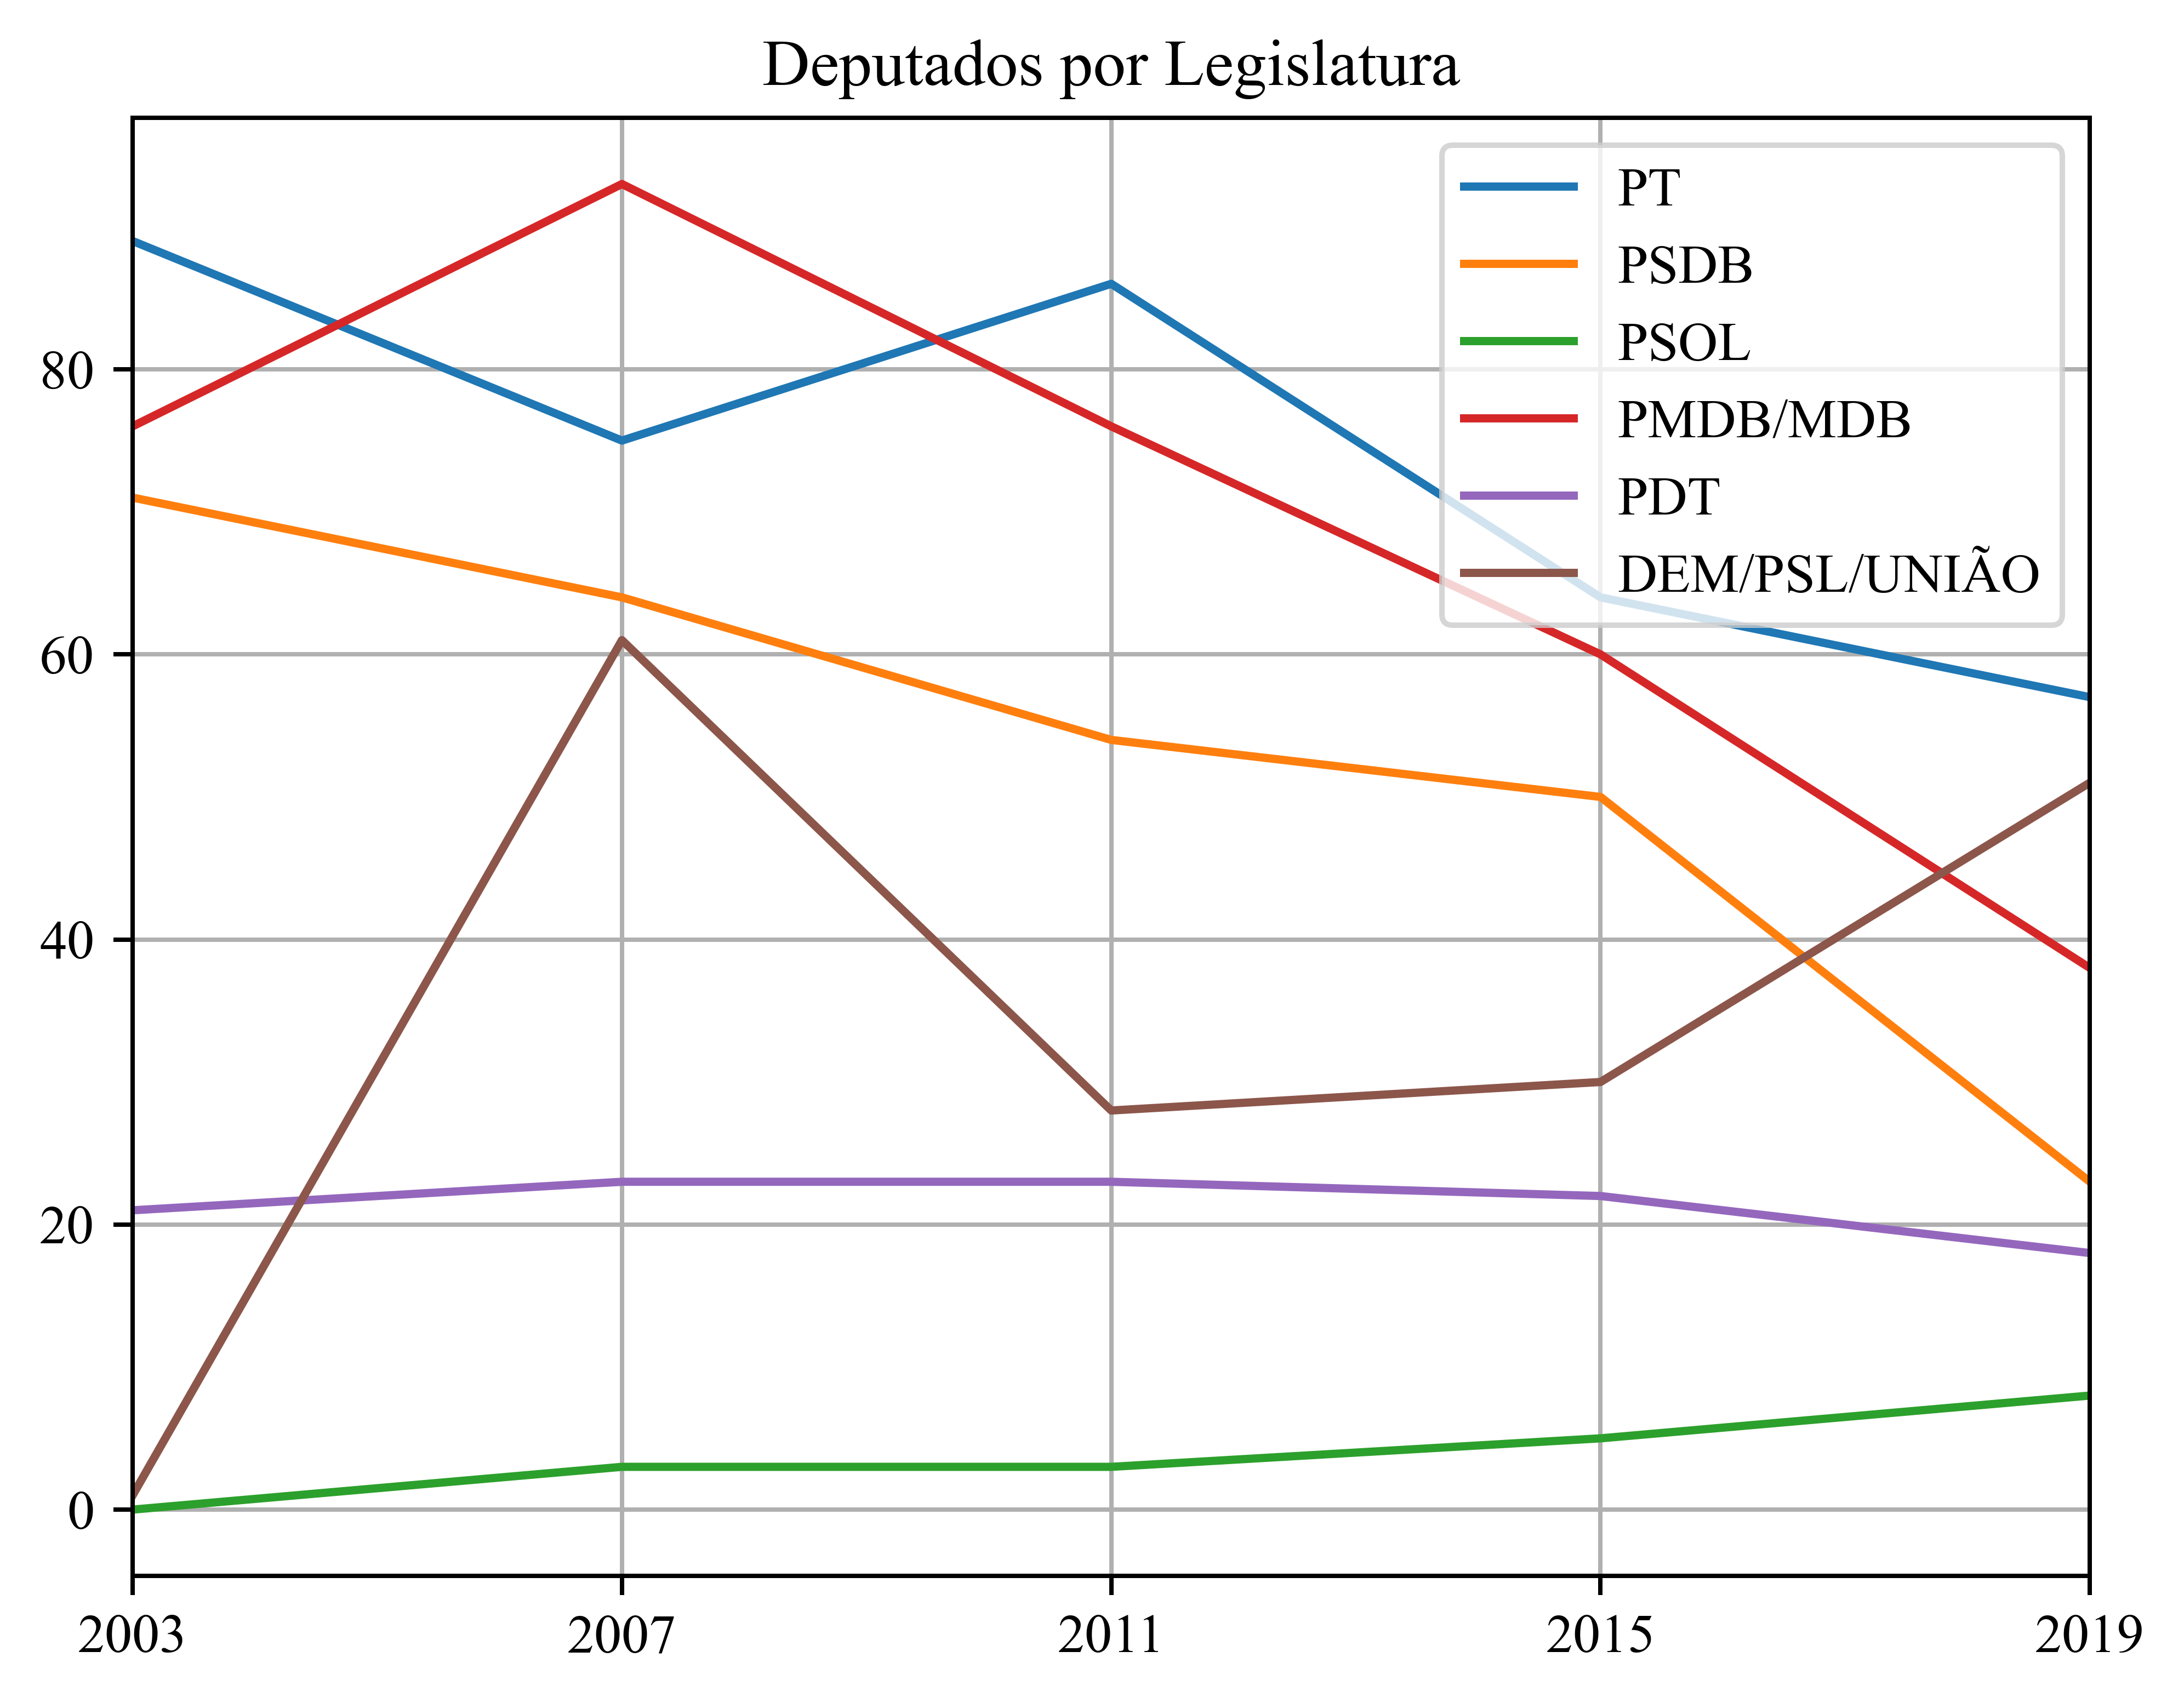

In [25]:
fig, ax = plt.subplots(dpi = 720)
for i in partidos: 

    ax.plot(df_final.index, df_final[i], label = i)

ax.grid()
ax.legend()
ax.set_title('Deputados por Legislatura')
ax.set_xlim(2003,2019)
ax.set_xticks(df_final.index)

plt.show()

# Olhando a média e desvio padrão

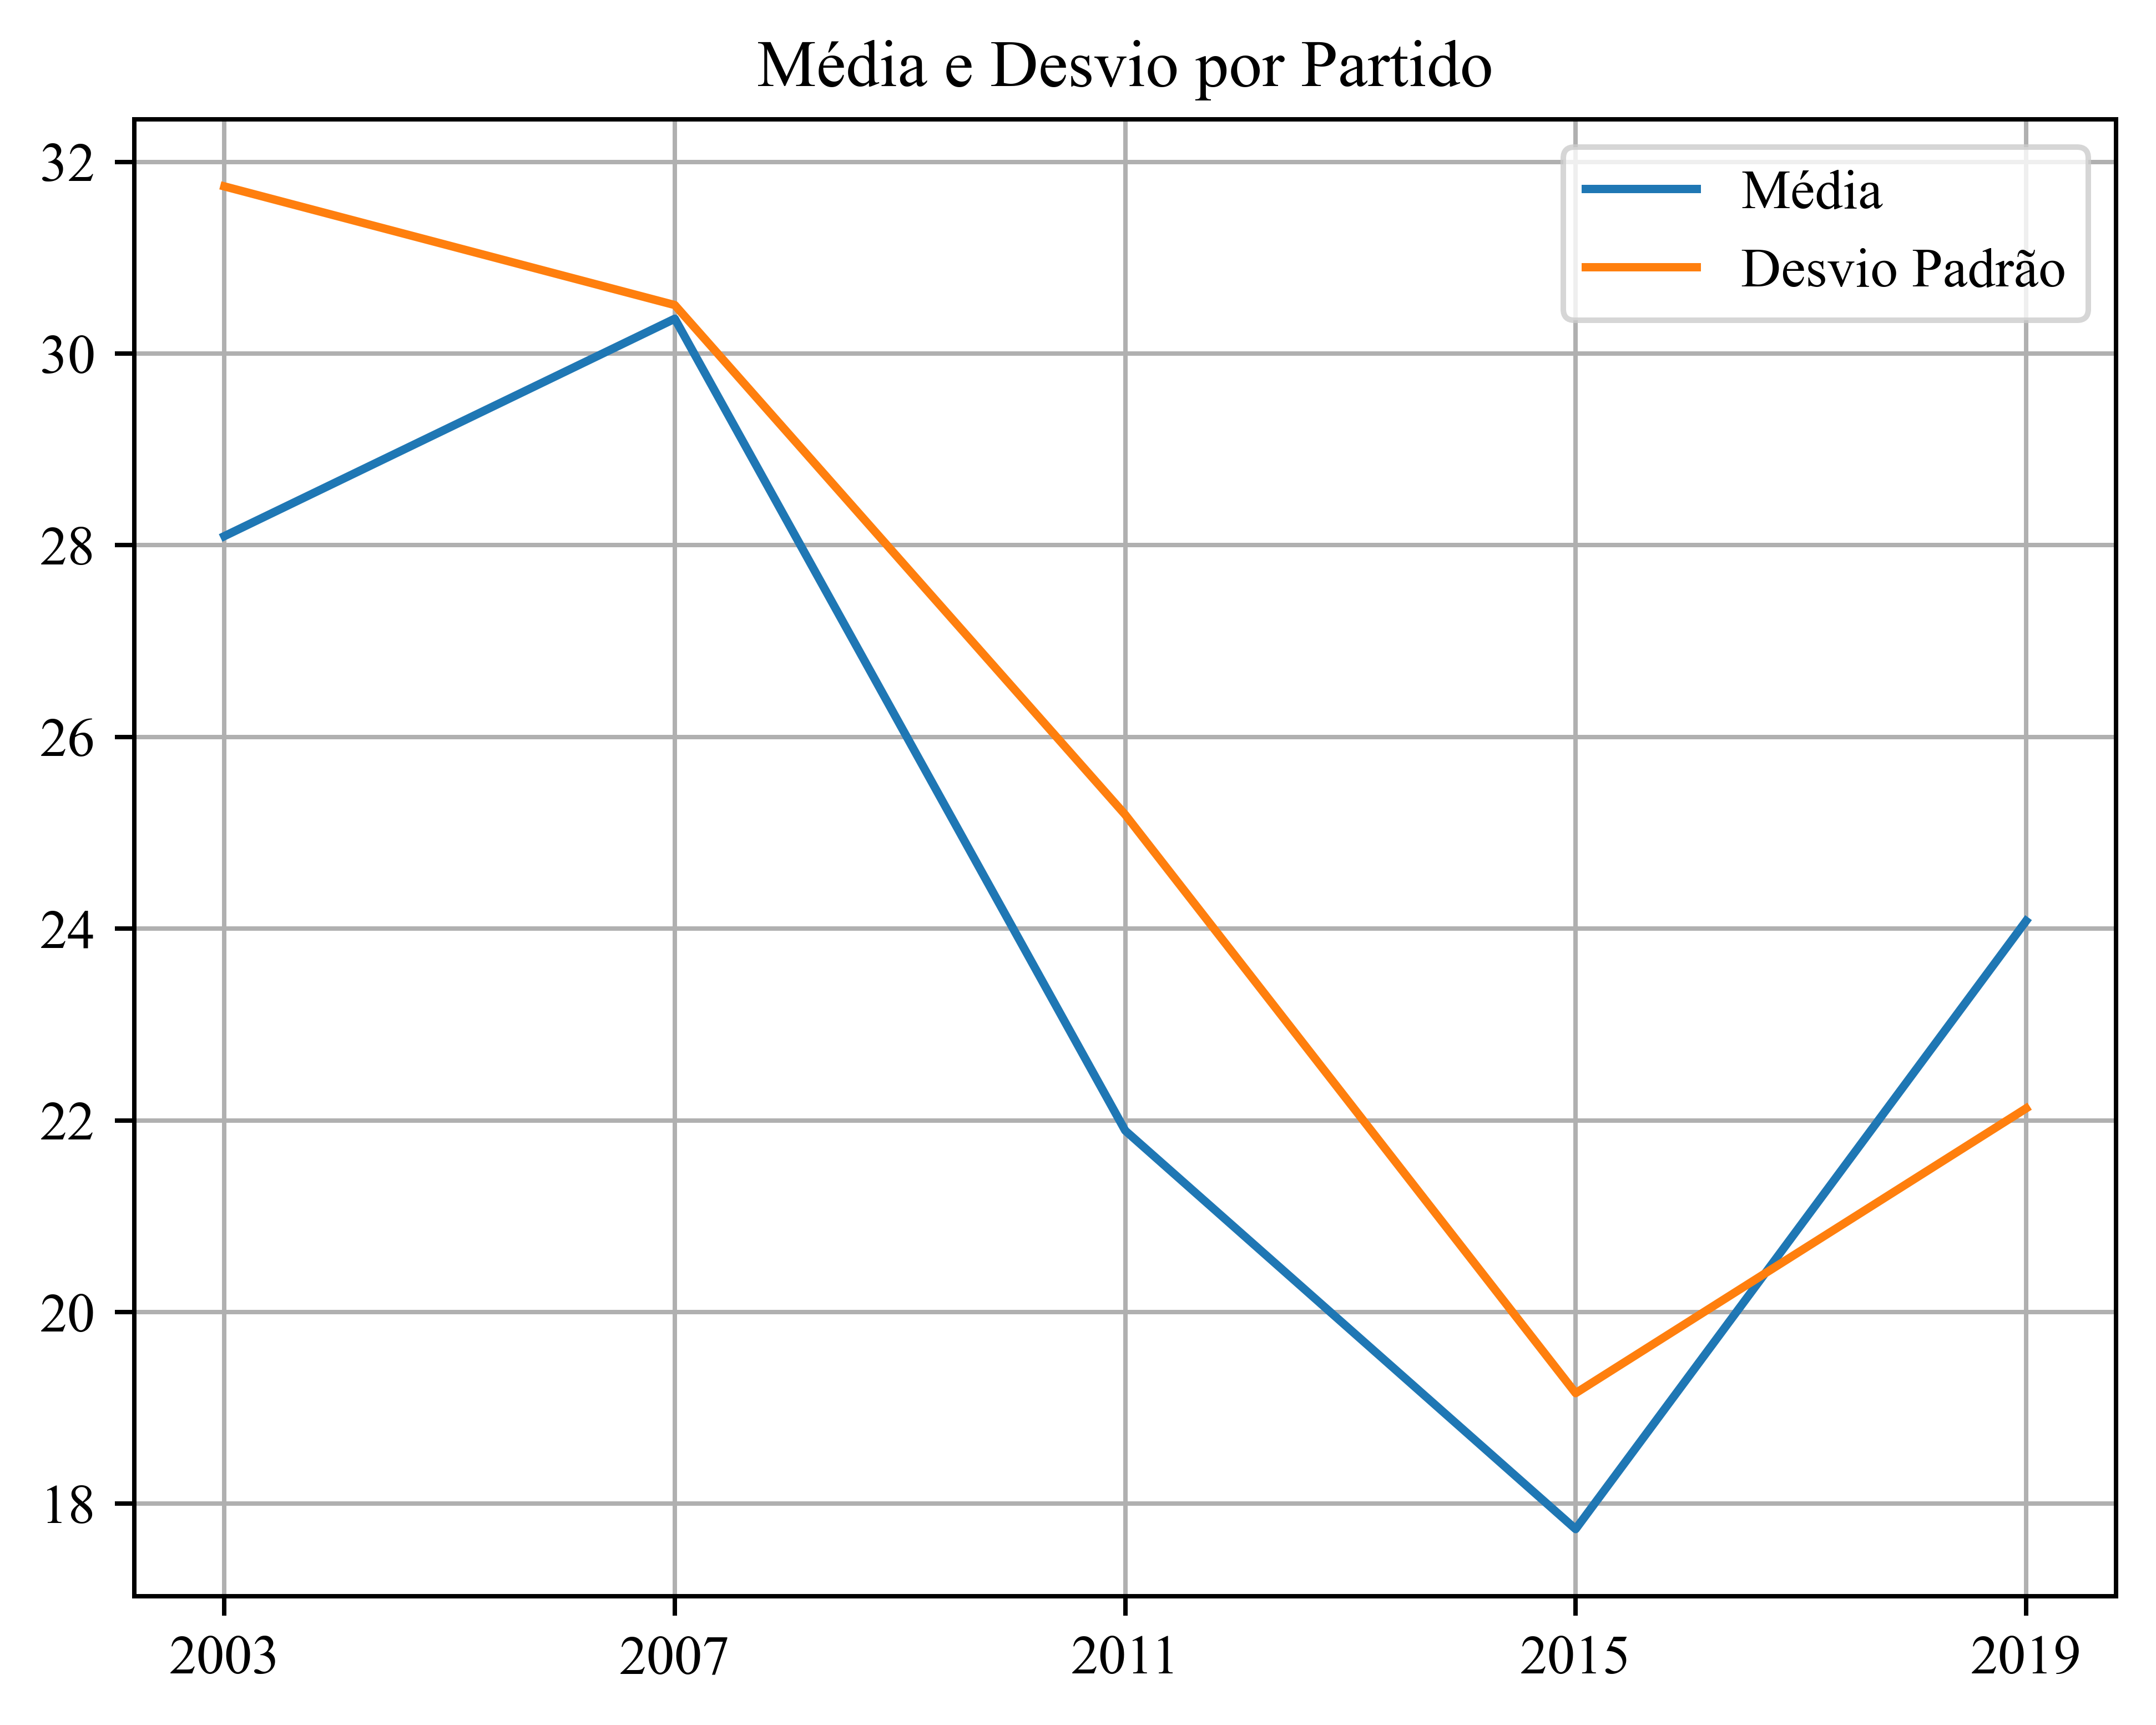

In [26]:
media = [df_final.loc[i][df_final.loc[i] > 0].mean() for i in df_final.index]
std = [df_final.loc[i][df_final.loc[i] > 0].std() for i in df_final.index]
fig, ax = plt.subplots(dpi = 720)
ax.plot(df_final.index, media, label = 'Média')
ax.plot(df_final.index, std, label = 'Desvio Padrão')
ax.legend()
ax.grid()
ax.set_title('Média e Desvio por Partido')
ax.set_xticks(df_final.index)

plt.show()

# Olhando para alguns estados em específico

In [27]:
# separando o código para criar o dataframe final depois de filtrar por estado

ano = 2019
estado = 'São Paulo'

legs = [df_2003, df_2007, df_2011, df_2015, df_2019]
legs = [i[['Partido','Estado']] for i in legs]
legs = [df.loc[df['Estado'] == estado,:] for df in legs]
anos = [2003,2007,2011,2015,2019]
dic = dict(zip(anos, legs))
for i in dic: 

    dic[i]['Ano'] = i

df = pd.concat([dic[i].reset_index() for i in anos], ignore_index = True)
df['Partido'] = df['Partido'].str.replace(' ','')
df['Partido'] = df['Partido'].apply(lambda x: x[:x.find('(')] if '(' in x else x)
df = df[['Partido','Ano']]
df = pd.DataFrame(df.groupby('Ano')['Partido'].value_counts()).reset_index()
df_final = df.pivot(values = 'count', columns = 'Partido', index = 'Ano').fillna(0)
df_final

Partido,Cidadania,DEM,MDB,NOVO,PCdoB,PDT,PFL,PL,PMDB,PODE,...,PT,PTB,PTC,PTN,PV,Republicanos,SD,SDD,Solidariedade,UNIÃO
Ano,,,,,,,,,,,,,,,,,,,,,
2003,0.0,0.0,0.0,0.0,2.0,1.0,8.0,3.0,3.0,0.0,...,18.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,5.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,0.0,...,14.0,4.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,...,15.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
2015,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,10.0,2.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2019,2.0,0.0,2.0,3.0,1.0,0.0,0.0,15.0,0.0,1.0,...,8.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,1.0,8.0


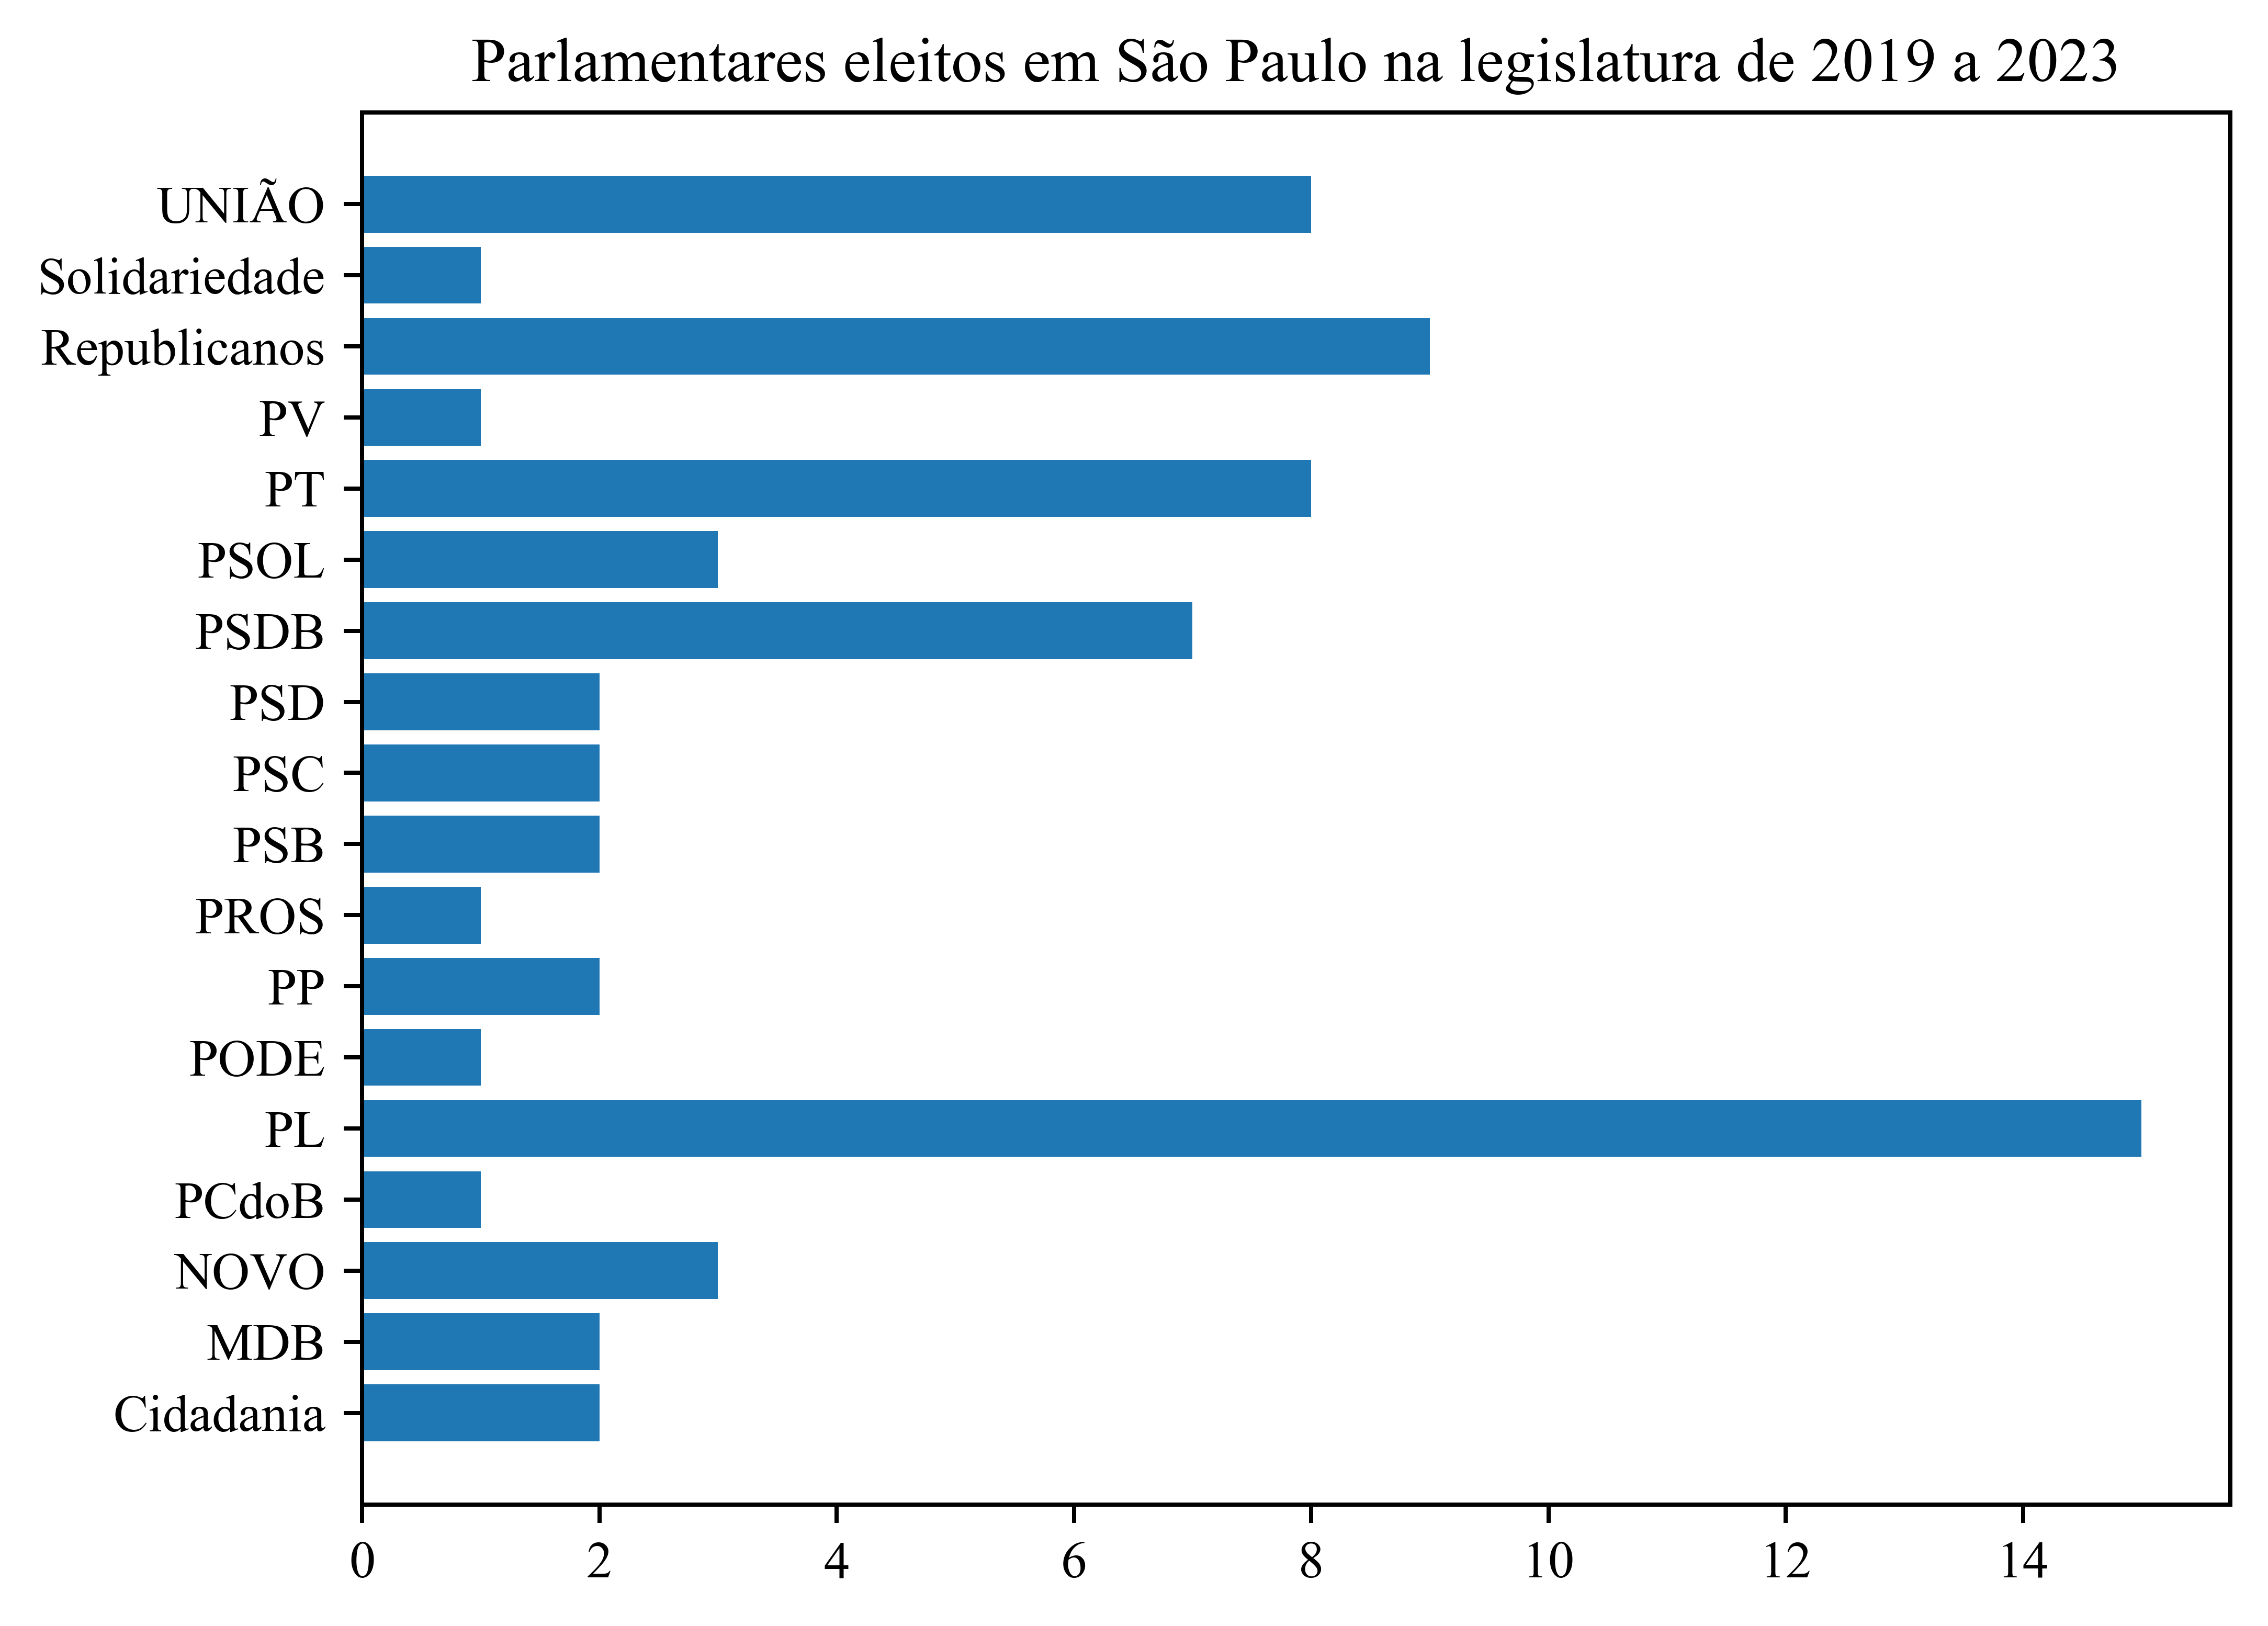

In [28]:
# olhando algum ano

data = pd.DataFrame(df_final.loc[2019][df_final.loc[2019] > 0]).reset_index()

fig, ax = plt.subplots(dpi = 720)

ax.barh(data['Partido'], data[ano])
ax.set_title(f'Parlamentares eleitos em {estado} na legislatura de {ano} a {ano + 4}')

plt.show()